In [1]:
import sympy

sympy.init_printing()

### Variable Definitions

In [2]:
t, r, theta, phi, phi_tilde = sympy.symbols("t r theta phi \\tilde{\phi}")

In [3]:
dt, dr, dtheta, dphi, dphi_tilde = sympy.symbols(r"dt dr d\theta d\phi d\tilde{\phi}")

In [4]:
a, delta, m, alpha = sympy.symbols("a delta m alpha")

In [5]:
r_tilde, delta_r, delta_theta, W, xi = sympy.symbols("\\tilde{r} Delta_r Delta_theta W Xi")

### Metric

In [6]:
metric_orig = -delta_r / W * (dt - a * sympy.sin(theta) ** 2 * dphi / xi) ** 2
metric_orig += delta_theta * sympy.sin(theta) ** 2 / W * (a * dt - (r_tilde ** 2 + a ** 2) * dphi / xi) ** 2

In [7]:
metric_orig

Make change of variables.

In [8]:
omega = sympy.symbols("Omega")
dphi_val = dphi_tilde - omega * dt

In [9]:
dphi_val

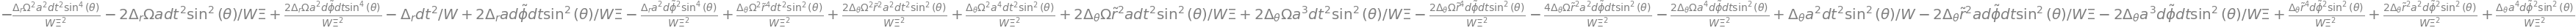

In [10]:
metric = metric_orig.subs({dphi: dphi_val}).expand()
metric

### Timelike Killing Vector Field

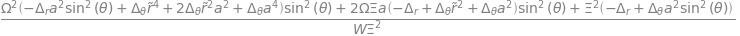

In [11]:
g_tt = metric.coeff(dt * dt).simplify()
g_tt

For there to be a timelike Killing vector field outside the horizon, this quantity must be less than zero:

In [12]:
sympy.fraction(g_tt)[0].simplify()

### Allowable Metric

In [13]:
tau, dtau = sympy.symbols("tau d\\tau")

In [14]:
dt_val = sympy.I * dtau

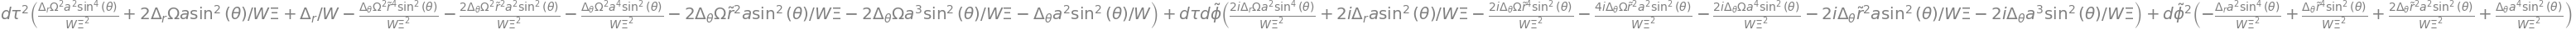

In [15]:
euclidean_metric = metric.subs({dt: dt_val}).collect([dtau ** 2, dtau * dphi_tilde, dphi_tilde ** 2])
euclidean_metric

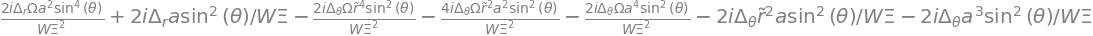

In [16]:
euclidean_metric.coeff(dphi_tilde * dtau)

In [17]:
metric_list_matrix = [[0 for i in range(2)] for i in range(2)]
metric_list_matrix[0][0] = euclidean_metric.coeff(dtau ** 2)
metric_list_matrix[0][1] = euclidean_metric.coeff(dtau * dphi_tilde) / 2
metric_list_matrix[1][0] = metric_list_matrix[0][1]
metric_list_matrix[1][1] = euclidean_metric.coeff(dphi_tilde ** 2)

In [18]:
g_mat = sympy.Matrix(metric_list_matrix)
g_mat

⎡    2  2    4                  2                   2          4    2         
⎢Δᵣ⋅Ω ⋅a ⋅sin (θ)   2⋅Δᵣ⋅Ω⋅a⋅sin (θ)   Δᵣ   Δₜₕₑₜₐ⋅Ω ⋅\tilde{r} ⋅sin (θ)   2⋅Δ
⎢──────────────── + ──────────────── + ── - ──────────────────────────── - ───
⎢         2               W⋅Ξ          W                   2                  
⎢      W⋅Ξ                                              W⋅Ξ                   
⎢                                                                             
⎢                     2    4                2                          4    2 
⎢             ⅈ⋅Δᵣ⋅Ω⋅a ⋅sin (θ)   ⅈ⋅Δᵣ⋅a⋅sin (θ)   ⅈ⋅Δₜₕₑₜₐ⋅Ω⋅\tilde{r} ⋅sin (
⎢             ───────────────── + ────────────── - ───────────────────────────
⎢                       2              W⋅Ξ                         2          
⎣                    W⋅Ξ                                        W⋅Ξ           

       2          2  2    2              2  4    2                          2 
ₜₕₑₜₐ⋅Ω ⋅\tilde{r} ⋅a ⋅sin (θ)   Δₜₕₑₜₐ⋅Ω ⋅a ⋅sin (

In [19]:
g_mat.simplify()
g_mat

⎡ 2 ⎛    2    2                      4                     2  2           4⎞  
⎢Ω ⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{r} ⋅a  - Δₜₕₑₜₐ⋅a ⎠⋅s
⎢─────────────────────────────────────────────────────────────────────────────
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                     ⎛  ⎛    2    2                      4                   
⎢                   ⅈ⋅⎝Ω⋅⎝Δᵣ⋅a ⋅sin (θ) - Δₜₕₑₜₐ⋅\tilde{r}  - 2⋅Δₜₕₑₜₐ⋅\tilde{
⎢                   ──────────────────────────────────────────────────────────
⎢                                                                             
⎣                                                                             

  2              ⎛                     2           2⎞    2       2 ⎛          
in (θ) + 2⋅Ω⋅Ξ⋅a⋅⎝Δᵣ - Δₜₕₑₜₐ⋅\tilde{r}  - Δₜₕₑₜₐ⋅a

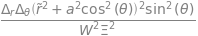

In [20]:
g_mat.det().simplify()

Assuming the parameters are real, the determinant is positive. Then requiring g_00 > 0 leads to the same condition as having a timelike Killing vector field outside the horizon, but you still need to ensure g_11 > 0.

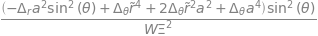

In [21]:
g_mat[1, 1]

In [22]:
r_tilde_val = r + 2 * m * sympy.sinh(delta) ** 2
delta_r_val = r ** 2 + a ** 2 - 2 * m * r + r_tilde ** 2 * (r_tilde ** 2 + a ** 2)
delta_theta_val = 1 - a ** 2 * sympy.cos(theta) ** 2

In [23]:
g_00_num = g_mat[1, 1] * W * xi ** 2 / sympy.sin(theta) ** 2
g_00_num

This is $\Sigma$ in the paper, but by the same logic as in the Witten paper, it must be greater than zero if the metric is still to be Lorentzian outside the horizon.

In [24]:
sigma = sympy.symbols("Sigma")
sigma_val = (r_tilde ** 2 + a ** 2) ** 2 * delta_theta - delta_r * a ** 2 * sympy.sin(theta) ** 2
sigma_val

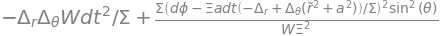

In [25]:
metric_trans = -W * delta_r * delta_theta / sigma * dt ** 2
metric_trans += sigma * sympy.sin(theta) ** 2 / (W * xi ** 2) * (dphi - (a * xi * (delta_theta * (r_tilde ** 2 + a ** 2) - delta_r) * dt / sigma)) ** 2
metric_trans

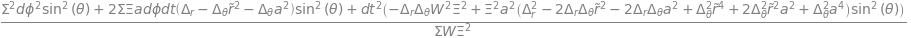

In [26]:
metric_trans_expanded = metric_trans.expand().simplify().collect([dt ** 2, dt * dphi, dphi ** 2])
metric_trans_expanded

This is the same as the original metric.

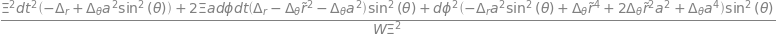

In [27]:
metric_orig.expand().simplify().collect([dt ** 2, dt * dphi, dphi ** 2])

The $dtd\phi$ and $d\phi^2$ components can be seen right away. To see that the $dt^2$ components are the same:

In [28]:
W_val = r_tilde ** 2 + a ** 2 * sympy.cos(theta) ** 2
W_val

From the transformed metric above, you have:

In [29]:
sympy.fraction(metric_trans_expanded)[0].coeff(dt ** 2).subs({W: W_val}).expand().simplify() / xi ** 2

This is equal to this, which is the component of the original metric.

In [30]:
((-delta_r + delta_theta * a ** 2 * sympy.sin(theta) ** 2) * sigma_val).expand()

### SUSY Condition

In [31]:
R = sympy.symbols("R")
r_val = R - 2 * m * sympy.sinh(delta) ** 2
r_val

In [32]:
a_val = 2 / (sympy.exp(4 * delta) - 1)
a_val

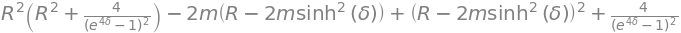

In [33]:
delta_r_in_R = delta_r_val.subs({r_tilde: r_tilde_val}).subs({r: r_val, a: a_val})
delta_r_in_R

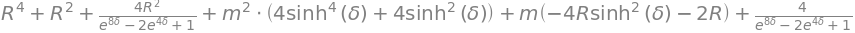

In [34]:
delta_r_in_R = delta_r_in_R.expand().collect([m, m ** 2])
delta_r_in_R

In [35]:
a_coeff = delta_r_in_R.coeff(m ** 2)
b_coeff = delta_r_in_R.coeff(m)
c_coeff = delta_r_in_R - a_coeff * m ** 2 - b_coeff * m

In [36]:
sinh_val = (sympy.exp(delta) - sympy.exp(-delta)) / 2
cosh_val = (sympy.exp(delta) + sympy.exp(-delta)) / 2
coth_val = (sympy.exp(2 * delta) + sympy.exp(-2 * delta)) / (sympy.exp(2 * delta) - sympy.exp(-2 * delta))

The real and imaginary parts of $m$ are the following.

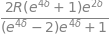

In [37]:
real_part = -b_coeff / (2 * a_coeff)
real_part = real_part.subs({sympy.sinh(delta): sinh_val})
real_part.expand().simplify()

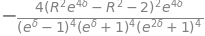

In [38]:
imag_part_square = b_coeff ** 2 / (4 * a_coeff ** 2) - c_coeff / a_coeff
imag_part_square = imag_part_square.subs({sympy.sinh(delta): (sympy.exp(delta) - sympy.exp(-delta)) / 2})
imag_part_square.expand().simplify().factor()

These match the paper.

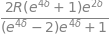

In [39]:
real_part_paper = R * sympy.coth(2 * delta) / (2 * sympy.sinh(delta) * sympy.cosh(delta))
real_part_paper = real_part_paper.subs({sympy.sinh(delta): sinh_val})
real_part_paper = real_part_paper.subs({sympy.cosh(delta): cosh_val})
real_part_paper = real_part_paper.subs({sympy.coth(2 * delta): coth_val})
real_part_paper.expand().simplify()

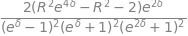

In [40]:
imag_part_paper = (R ** 2 + 1 - sympy.coth(2 * delta)) / (2 * sympy.sinh(delta) * sympy.cosh(delta))
imag_part_paper = imag_part_paper.subs({sympy.coth(2 * delta): (sympy.exp(2 * delta) + sympy.exp(-2 * delta)) / (sympy.exp(2 * delta) - sympy.exp(-2 * delta))})
imag_part_paper = imag_part_paper.subs({sympy.sinh(delta): (sympy.exp(delta) - sympy.exp(-delta)) / 2})
imag_part_paper = imag_part_paper.subs({sympy.cosh(delta): (sympy.exp(delta) + sympy.exp(-delta)) / 2})
imag_part_paper.expand().simplify().factor()